# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [3]:
dataset.describe()

# Displaying the average (mean) and standard deviation (std)

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [4]:
dataset.quantile(q=[0.1, 0.9], numeric_only=True)
# Calculating the 10th and 90th percentile range

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0.1,11.0,7.0,62.69,3.0,23.0,NaN
0.9,21.0,17.0,93.83,16.0,38.0,NaN


<AxesSubplot:>

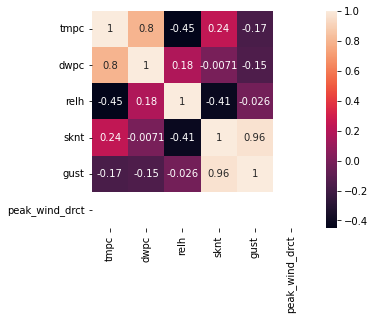

In [5]:
sns.heatmap(dataset.corr(), annot=True, square=True)
# Correlation plot.
# If the value is near to 1 or -1, there is likely a pattern
# Values closer to the 0 indicate that the plot probably does not have a noticable pattern.

# From the plot we see that sknt and gust have a value of 0.96, indicating that there is a high chance of there being a pattern (as the value is close to 1).

C:\Users\ibrah\AppData\Local\Temp\ipykernel_8420\1415092889.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


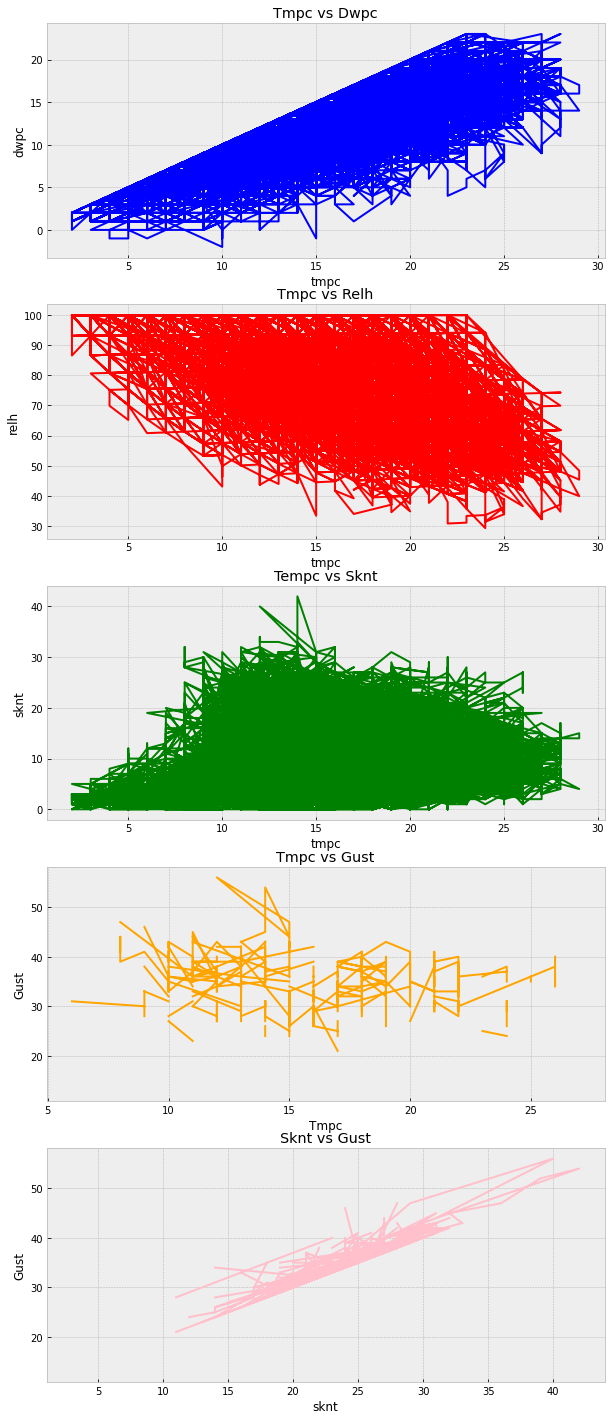

In [6]:
# Graphing numerical sections
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(dataset["tmpc"], dataset["dwpc"], color="blue")
ax1.set_title("Tmpc vs Dwpc")
ax1.set_xlabel("tmpc")
ax1.set_ylabel("dwpc")

ax2.plot(dataset["tmpc"], dataset["relh"], color="red")
ax2.set_title("Tmpc vs Relh")
ax2.set_xlabel("tmpc")
ax2.set_ylabel("relh")

ax3.plot(dataset["tmpc"], dataset["sknt"], color="green")
ax3.set_title("Tempc vs Sknt")
ax3.set_xlabel("tmpc")
ax3.set_ylabel("sknt")

ax4.plot(dataset["tmpc"], dataset["gust"], color="orange")
ax4.set_title("Tmpc vs Gust")
ax4.set_xlabel("Tmpc")
ax4.set_ylabel("Gust")

ax5.plot(dataset["sknt"], dataset["gust"], color="pink")
ax5.set_title("Sknt vs Gust")
ax5.set_xlabel("sknt")
ax5.set_ylabel("Gust")

fig.set_size_inches(10,25)

fig.show()

The correlation plot shows a high correlation between sknt and gust (0.96). This is because the closer the value is to 1 (or -1), the more chance there is to be a pattern/correlation. Plotting this graph of sknt vs gust (ax5) shows that there may be a linear correlation between the two as a straight line can be deduced from the graph.

# Data Processing

In [7]:

dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.



,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [8]:
# We aim to use the date to predict the temperature after one month. Besides date and temperature, we drop all columns as we do not need them further.
dataset.drop(columns=[" station", "peak_wind_drct", "dwpc", "relh", "sknt", "gust"], inplace=True)

# Drop all rows with missing values to create a new data set which does not have any NULL values/rows.
newDataset = dataset.dropna()
newDataset.head()

,valid,tmpc
0,2015-01-01 00:00,21.0
1,2015-01-01 00:30,21.0
2,2015-01-01 01:00,21.0
3,2015-01-01 01:30,21.0
4,2015-01-01 02:00,21.0


In [9]:
# We need a way to measure the date for our model. Here, we convert the date to time in seconds after January 1st 2000, so that we can compare different
# dates as times. The function covertTime does this for us. We apply this function to the "valid" column of our dataset to convert all dates to seconds.

# Function to convert date to seconds
from datetime import datetime
def convertTime(timeInput):
    datem = datetime.strptime(timeInput, "%Y-%m-%d %H:%M")
    DN = (datem - datetime(2000,1,1)).total_seconds()
    return DN

# Converting whole column of dates to a new column of time
newDataset["time"] = newDataset["valid"].map(lambda valid: convertTime(valid))
newDataset.head()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_8420\2284756519.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDataset["time"] = newDataset["valid"].map(lambda valid: convertTime(valid))


,valid,tmpc,time
0,2015-01-01 00:00,21.0,473385600.0
1,2015-01-01 00:30,21.0,473387400.0
2,2015-01-01 01:00,21.0,473389200.0
3,2015-01-01 01:30,21.0,473391000.0
4,2015-01-01 02:00,21.0,473392800.0


In [10]:
# Creating a train and test model for the dataset, using time as input and temperature (tmpc) as output.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newDataset[["time"]], newDataset["tmpc"], test_size=0.2)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82942 entries, 43450 to 27662
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    82942 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20736 entries, 66456 to 37913
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    20736 non-null  float64
dtypes: float64(1)
memory usage: 324.0 KB


In [13]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 82942 entries, 43450 to 27662
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
82942 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [14]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 20736 entries, 66456 to 37913
Series name: tmpc
Non-Null Count  Dtype  
--------------  -----  
20736 non-null  float64
dtypes: float64(1)
memory usage: 324.0 KB


In [ ]:
# Reasons for changes made in dataset:

# Dropping all columns except date (valid) and temperature (tmpc): These are the two columns whose correlation we are interested in, so 
# we drop all the remaining columns.

# Dropping all rows with null values: This is done so that we have a valid set of data which we can use in our modelling.

# Adding a new column for time in seconds: This is done so that we can use the time in seconds in our model testing.

# Data Modelling

In [15]:

import pandas as pd

# We use the Decision Tree Regressor model for our dataset.
from sklearn import tree

from sklearn.model_selection import train_test_split

In [16]:
# Fitting the model
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [17]:
# The score for our model is 0.97, which suggests that it is very accurate.

model.score(X_test, y_test)

0.9698502073463312

In [18]:
newDataset.tail()

,valid,tmpc,time
103708,2020-12-30 21:30,19.0,662679000.0
103709,2020-12-30 22:00,19.0,662680800.0
103710,2020-12-30 22:30,20.0,662682600.0
103711,2020-12-30 23:00,20.0,662684400.0
103712,2020-12-30 23:30,22.0,662686200.0


In [19]:
# Our last date in our dataset is 30th December 2020 23:30. One month from then will be 30th January 2021 23:30.
# We can enter this date in our convertTime function to get the time in seconds, and pass that onto our prediction  model.

oneMonthFromNow = convertTime("2021-01-30 23:30")

model.predict([[oneMonthFromNow]])


c:\Users\ibrah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([20.])

In [317]:
# As we see, our model predicts that the temperature will be 20 degrees in one month.

# Conclusion

* After exploratory data analysis (EDA), we revised the dataset to contain only the date, temperature and time (in seconds). We converted the date to time so that we can use the data in our prediction model.

We used the Decision Tree Regressor model from SciKit for our analysis. Decision Trees are a supervised learning method wherin the model predicts the value of a target variable by learning simple decision rules from the data provided. The tree is like a piecewise constant approximation.

Once we fitted our data to the model, our model scored 0.97. This is very close to 1 so it suggests that our model is very likely to be quite accurate.

After that, we used our model and gave it input of a date (time) which is one month from the last date in our dataset. Our model then predicted that the temperature after one month (on 30th January 2021 23:30) will be 20 degrees. This prediction has an accuracy of 0.97.